# NST IA Scientific Computing Session 7

# Programming

  This seventh session of the course is 
mainly a very basic introduction to programming. 
  You have already been scripting (programming / coding) in
the Jupyter notebook cells in earlier sessions. 
  These notebooks represent a very convenient and interactive
way of coding (the traditional way puts all the
code in one single file).
  
  We will introduce **control structures**, mainly 
*loops* and *conditional statements*, as well as functions. 
  Two key concepts in programming, namely, 
**documentation** and **modularity**, will be illustrated. 

  You should work through the tasks given below. 
The worksheet is split into three sections:

- The first section will guide you through a series of 
  exercises related to scripting and programming.
- In the second section, you will obtain the temperature 
  dependence of an order parameter within the Bragg-Williams 
  theory for an order-disorder phase transition, by means of 
  a program that minimises an effective free-energy function 
  at different values of the temperature. 
  You will then submit a notebook containing the coding and
  two annotated figures.
- In the last section, you will move onto some further 
  examples of programing.

We actively encourage you to work with your colleagues 
and discuss the material - however your submission must be 
your own work. 
  Ask the demonstrators for help when needed.

## Section 1. Simple programming exercises

### What is a program

The python cells you have already worked with in 
the Jupyter notebooks are already simple programs: 
*a file with a set of instructions to be executed in sequence*.
Last week's submission (the notebook performing
a Fourier interpolation of seven random points) is a program
that you coded, which

1. imports libraries, such as NumPy,
2. generates a couple of matrices (**a** and **g**),
3. inverts **g**,
4. multiples **g**-inverse and **a**, and
5. gives you (and plots) the interpolated function in whatever range.

If you were to get all the coding cells of that notebook and 
put their code into a single text file, it would run like a
python program. Although simple, it already captures the essence
of a program. 

  Today we will introduce and use the following concepts
that will infinitely enhance the power of your programming:

- Functions
- Control structures
  - Conditionals, `if`
  - loops

We will also illustrate two cornerstones of programming

- Modularity
- Clarity and documentation

The details of each command are peculiar to 
python, but today's key concepts are common to any programming
language.

There are many sources of information, documentation and tutorials
for python (it is an extremely popular language). 
See for instance 

https://docs.python.org/3/tutorial/index.html

It is however easy to drown in documentation. We will guide you
through key programming concepts here as a taster of 
a very powerful tool for the natural sciences. 
It will be continued in following years.

### Functions

  One key principle in programming is **modularity**.
  Programs can be extremely complex, some programs 
containing millions of lines of code.
  It is extremely important for its development and 
maintainability that the program be based on **small 
independent units**, which  perform **well defined tasks and 
can be isolated and tested independently**.

  Different computer languages have different kinds of units,
such as subroutines, modules, functions etc.
  Here we introduce **functions** a key concept for 
many languages including python.

  A function is a piece of code, which runs when called,
receiving data sent as so-called paramters and giving data in
return.

  Many of the commands you have already used are functions, and
actually quite sophisticated ones, with many lines of code
within them.
  Such is the case for the function `inv` you used to 
invert that **g** matrix: you sent **g** as parameter
and received its inverse back.
  It is one of the many linear algebra functions in 
the linalg set of NumPy. 

  The `import` command gives you access to all the functions
in a library which you can then invoke as part of your program.
Let us do it here, as part of the following preliminaries

In [ ]:
# Importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize    # For minimisations we will use as part of a program
from numpy import pi
from numpy.random import rand, randn   # It generates random matrices

np.set_printoptions(suppress=True) # makes tiny values appear as zero
np.set_printoptions(precision=4)   # number of digits in floats (or longfloats)

  
We will illustrate functions with simple examples.
 

#### Defining a function

  Let us define a python function for one of the waves in 
the practical of Session 5, the one with two pulses travelling left and right,
\begin{equation*}
\psi_b(x,t) = \frac{A}{2} \left ( \frac{\sin [ k (x-ct) ]}{k(x-ct)} + \frac{\sin [ k (x+ct) ]}{k(x+ct)} \right )
\end{equation*}
We do it as follows (notice indentation, which is important for python):

In [ ]:
# Functions for the two pulses, travelling right and in both directions
# Input parameters: 
#   x: space 1D
#   t: time 
# It also depends on
#   c: wave group velocity
#   k: wave number
#   A: wave amplitude
# They are defined in the namspace of the same module defining the function.

def psib(x,t):
    eps = 0.                           #  Stability parameter, use 10.**(-5.)
    arg1 = k*(x-c*t); arg2 = k*(x+c*t)
    wave = A / 2. * ( np.sin(arg1)/(arg1 + eps) + np.sin(arg2)/(arg2 + eps) )
    return wave

Once defined, we can use it to plot the wave:

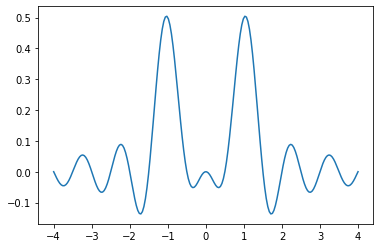

In [ ]:
c = 1.     # wave speed
A = 1.     # Amplitude
k = 2.*pi  # Wavenumber

t = 1.
x = np.linspace(-4.,4.,200)
plt.plot(x,psib(x,t))       #  <------- Here is where we call the function
plt.show()

### Documentation 

The second key principle in good programming is **clarity**.
A program should be clear, self-explanatory. 
and for that, *documentation, documentation, documentation*, 
it cannot be emphasised enough. 
  That means one should introduce comments explaining the 
way the program works in the program itself, so that when 
another person (or yourself after a year) confronts the 
program, it can be easily understood and further developed.

In the case of the defined function, see the comments in 
the cell with the function definition above. 
The python bit is quite small in comparison.

In a Jypyter notebook one can explain very nicely in the text
cells whatever you do in the code cells, but when programming
in a normal environment (a text file with the source code), 
the explanations go in the program as comments. 

### Loops

  Loops  represent a very powerful control structure used to
perform repetitive tasks.
  See for example:
  

In [ ]:
for j in np.arange(1, 9, 2):  # it can also go with python's range instead of np.arange   
    print('ha!', j, 'cubed ->',j**3) # indentation important: within loop
    print("-------")
print('and it stopped.') #not indented, outside the loop

ha! 1 cubed -> 1
-------
ha! 3 cubed -> 27
-------
ha! 5 cubed -> 125
-------
ha! 7 cubed -> 343
-------
and it stopped.


In [ ]:
names = ['John', 'Jane', 'Peter', 'Gertrud', 'Frederic', 'Aurelia', 'Gurmesindo']

for nam in names:  
    print('My name is', nam) 

My name is John
My name is Jane
My name is Peter
My name is Gertrud
My name is Frederic
My name is Aurelia
My name is Gurmesindo


See the structure conventions: the loop declaration with the command
`for`, the definition of the dummy control variable (`j` and `nam` in the
examples) and the range of values
it will acquire in sequence as specified in the control array 
(which therefore defines how many times it will run for), followed by a colon.

  All the indented commands after the `for` command will be executed 
as many times as determined by the range of values of the dummy.
  It can contain many, and it can contain other loops or other control 
structures *nested* inside.

  There is no need to use the control variable within the loop. 
Do, for example,

In [ ]:
# Average of random data following a normal distribution

n = 50  # number of data points
sum = 0 # initialise variable storing the sum
for j in range(n):
   sum = sum + 1 + 0.1 * randn()

print(sum/n)     # Run it several times (change n as well)

1.0287876696050262


This little program generates a set of $n$ random numbers according to a normal 
distribution of width 0.1 around 1.0, and averages them out.
  Take a moment to see and understand the construction
```
  sum = sum + ...
```

  There are other ways to perform this kind of simple
examples in python using arrays, but this explicit construction will give you much
more flexibility, as  in the next example.
  

### Conditional

Try the following,

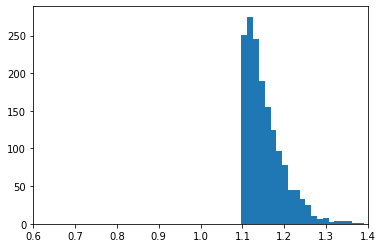

In [ ]:
# Generates and plots a truncated normal distribution

n = 10000                           # number of points
data = np.zeros(n)                  # initialise the array to store the data

count = 0 
for i in range(n):
   a = 1 + 0.1*randn()              # data point following normal distribution
   if a > 1.1:
     count = count+1                # data point only counted ...
     data[count] = a                # ... and stored if fulfilling the condition

plt.xlim(0.6, 1.4)
plt.hist(data[0:count], bins = 100) # only for the stored data
plt.show()                          # it shows the truncated gaussian

This program generates the same kind of random numbers as before,
but it only counts and stores the ones that are lower than 1.1. 
  There is no NumPy predefined function that does this for you.

Within the loop you see the conditional structure 
(with its added indentation).
  The indented commands below the `if` command
will be executed only if the condition 
```
a < 1.1
```
is fulfilled.
  If the condition is not fulfilled, all the indented commands
below are ignored.

The loop and the conditional control structures 
in this program are said to be *nested* (one within the other). 
  You can have loops within other loops, and 
within conditionals, or conditionals within loops etc.
  Each structure carries its own indentation, indicating
where it finishes. 
  In this case both finish after storing the data point.


  The conditional structure can be also used more generally
as follows: 
```
if condition:
   list of instructions
elif condition2:
   instructions
else:
   instructions
```
both `elif` and `else` are optional, and their working
is self-explanatory. Try it out modifying the above loop

  Conditions are normally expressed in terms of

- Equal: `a == b` (the `=` is used for assignment, `==` comparison)
- Not Equal: `a != b`
- Greater than: `a > b`
- Greater than or equal to: `a >= b`
- Less than: `a < b`
- Less than or equal to: `a <= b`

You can also combine conditions with `and`, `or`, as shown here

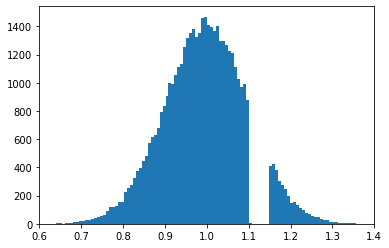

In [ ]:
# Generates and plots a gapped normal distribution

n = 50000                           # number of points
data = np.zeros(n)                  # initialise the array to store the data

count = 0 
for i in range(n):
   a = 1 + 0.1*randn()              # data point following normal distribution
   if a < 1.1 or a > 1.15:          # <-- HERE IS THE DIFFERENCE!!
     count = count+1                # data point only counted 
     data[count] = a                # and stored if fulfilling the condition
  
plt.xlim(0.6, 1.4)
plt.hist(data[0:count], bins = 200) # only for the stored data
plt.show()                          # it shows the gapped gaussian

Back to the wave plot above. Let us tweak the plot so very slightly

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


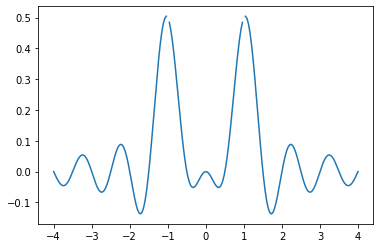

In [ ]:
c = 1.     # wave speed
A = 1.     # Amplitude
k = 2.*pi  # Wavenumber

t = 1.
x = np.linspace(-4.,4.,201) #  <-- Here is the tweak: 201 instead of 200
plt.plot(x,psib(x,t))       
plt.show()

The plot looks the same, except for a couple of white spots on 
the two maxima, and a nasty warning message. 
This is to do with trying to evaluate $(\sin \alpha) / \alpha$ 
for $\alpha = 0$. We know it is 1, as a well defined limit, 
but NumPy sees $0/0$.

Many among you found this problem in Session 5, and we skirted 
around it by changing the sampling (discretisation) so that it
was never evaluated at zero, or by slightly changing the function.
Here you find a better solution by defining the function using 
the tools presented above. See that you understand what it does:

In [ ]:
"""
Function for the two pulses, travelling right and in both directions

with provision for 0/0

Input parameters: 
   x: space 1D
   t: time 
It also depends on (defined externally)
   c: wave group velocity
   k: wave number
   A: wave amplitude
They are defined in the namspace of the same module defining the function.
"""

def psib0(x,t):
    eps = 10.**(-5.)  
    
    arg1 = k*(x-c*t)
    arg2 = k*(x+c*t)
    for i in range(len(arg1)):
        if abs(arg1[i]) < eps:
           arg1[i] = eps        # we do not worry about the sign here, no matter.
        if abs(arg2[i]) < eps:
           arg2[i] = eps
                   
    wave = A / 2. * ( np.sin(arg1)/arg1 + np.sin(arg2)/arg2 )
    return wave

Generating the plot with the new function:

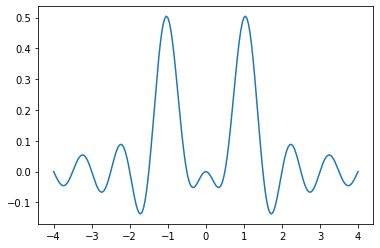

In [ ]:
c = 1.     # wave speed
A = 1.     # Amplitude
k = 2.*pi  # Wavenumber

t = 1.
x = np.linspace(-4.,4.,201)
plt.plot(x,psib0(x,t))       #  <------- 201 points but with new function
plt.show()

With combinations of conditional statements, loops, nested
structures, functions, plus all the other commands (functions)
in libraries such as NumPy (as learned so far), 
one can develop quite sophisticated programs.
  These concepts are common to most programming languages,
although the particular keywords and syntax may vary.

  There are many other concepts (such as object, class, attribute,
different kinds of data structure etc.) and commands that can
be used, and enormous amounts of libraries (puthon an extremely 
active and numerous coding community).
  You will get deeper into coding and python in later courses.

  The quality of the programming, however, will depend not only
on functionality, but also on clarity, modularity and, in general
everything that can help maintaining and further developing the
program. 
  A program that works perfectly but is so inscrutable that cannot 
be modified easily is a dead program: you all know how frequently 
programs (apps) are updated in today's world. A stagnated 
program has a lifetime of months at most.

Here you can see the source code of linalg, the linear algebra
part of NumPy:

https://github.com/numpy/numpy/blob/master/numpy/linalg/linalg.py

Around line 447 you see the start of the `inv` function.
The firsst 60 lines are documentation (comments, non-executable),
Using another way of introducing comments
```
"""
as many lines of comments you want between triple double-quotes
"""
```
The function itself is quite short since it is a wrapper 
calling other functions from linalg.

### Minimiser

Before facing the exercise for submission, let us introduce here another
useful function, predefined in `scipy`, which was imported before: 
the `minimize` function (American spelling). 
It finds local minima of functions. We will use it for the exercise, but
here an illustration of how it works.
Consider the following function

\begin{equation*}
f(x) = a x + b x^2 + c x^4 + d x^6
\end{equation*}

with $b$ and $d$ positive but $c$ negative. Here an example plotted

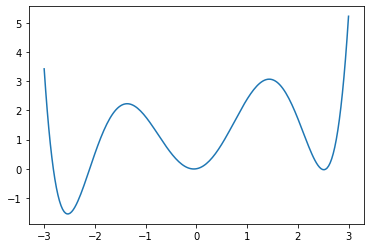

In [ ]:
def poly6(x):
    a = .3; b = 3.; c = -1.; d = .08
    return a*x + b*x**2 + c*x**4 + d*x**6

xs = np.linspace(-3.,3.,200)
ys = poly6(xs)

plt.plot(xs, ys)
plt.show()

The `minimize` function allows finding the local minima as follows

In [ ]:
# Minimisation using Nelder-Mead Simplex algorithm

x0 = -2.0   # Starting point
res = minimize(poly6, x0, method='nelder-mead', options={'xatol': 1e-8})
# xatol is tolerance: Absolute error in x between iterations acceptable for convergence.

print(res.x, "{:.4f}".format(res.fun)) # first: array (1D in this case) for min location
                                       # second: value of function at location

[-2.5351] -1.5478


You can run it for different values of `x0`. 
You can see that it does not find the lowest minimum,
but a local one (normally, but not necessarily, the closest).

The `minimize` function is quite general and powerful. 
It allows for minimisations of functions in many dimensions,
and it allows for different methods, including ones based
not only on evaluation of the function (as the Simplex
method used here), but also using first and second derivatives.

We will use the simplex method in the exercise below. 


<hr style="border:1px solid black"> </hr>

## Section 2. Submitting Your Work for Course Credit

  You will write a small program obtaining and plotting the 
equilibrium order parameter in a metallic alloy versus temperature.
  This program will loop over values of temperature, 
minimising a free-energy expression for each one of them.
  This free energy will be defined as a function file.

### The Bragg-Williams model

  In many materials, such as metal alloys, there is a transition between 
two phases in which the atoms are ordered or disordered over 
sites within the crystal. 
  The potential energy prefers the ordered state, but the entropy prefers 
the disordered state. 
  The contributions to the overall energy from the potential energy and 
the entropy can be written in terms of what is called a free energy, 
given the symbol $F$, and the state of order can be characterised by a 
quantity called the order parameter, $Q$, whose value varies between 
$Q = 1$ for fully ordered and $Q = 0$ for completely disordered. 
  One early attempt to develop a theory for this type of phase transition, 
now known as the Bragg-Williams model, led to the following expression 
for the free energy:

\begin{equation*}
F = -T_c Q^2 +T [(1+Q)\ln(1+Q)+(1-Q)\ln(1-Q)]
\end{equation*}

where $T$ is the temperature, and the parameter $T_c$ turns out to be 
the temperature of the phase transition.
 The equilibrium value of $Q$ at any temperature is that for which $F$ 
is a minimum.

### Exercise

- Write a function `bw` of `q`, returning the free energy $F$. Not to worry
  about `Tc` and `T`, they wiil be defined externally.  
- Plot $F$ versus $Q$ using the `bw` function, for 
  $Q \in (-1.0, 1.0)$ (excluding the limits), with $T_c =1.0$,
  and for three values of the temperature $T=0.8$, 
  $1.0$, and $1.4$ (as three superimposed curves).
- Write a program that loops over 200 values of $T$ between 
  0.5 and 1.2, and for each temperature finds the equilibrium 
  $Q_e(T)$, i.e. the value of $Q$ that minimises the free energy $F$
  at a given $T$ (always use $T_c=1.0$), using `minimize` with the 
  `bw` function defined above.
  (Careful with the initial value of $Q$ in the minimisation, since
  the process can take it to values that the $\log$ may dislike. 
  0.9 seems to work).
- Structure the program in such a way that it contains 
  initialisations of the main variables at the beginning with 
  comments describing them (number of values of $T$, initial 
  and final values of $T$, same for $Q$ for the initial figure etc.)
- Plot the obtained values of $Q_e$ versus $T$. 
  See the transition from finite to zero $Q_e$ at $T=T_c$. 
  Plot the curve with a thicker line than the one used for 
  the axes, so that it can be distinguished if they overlap.
- Have both the program and the function well documented with 
  comments, appropriate indentation and empty-line separations.
  
**Following the instructions on Moodle, submit the Jupyter notebook with the generated code and figures.**

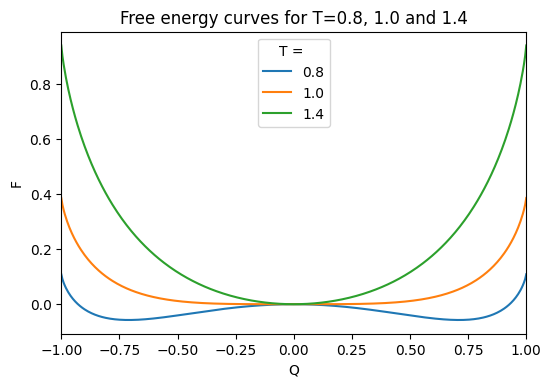

In [ ]:
# Defining the BW function
# q is the order parameter
# F is the free energy
# Tc is the temperature of the phase transition
# T is the temperature
# Tc and T are to be defined externally

def bw(q) :
  eps = 10**(-5) #Excluding values that are undefined in the log function
  for i in range(len(q)):
    if abs(1+q[i]) < eps :
      q[i] = eps-1
    if abs(1-q[i]) < eps :
      q[i] = 1-eps

  F = -Tc*q**2+T*((1+q)*np.log(1+q)+(1-q)*np.log(1-q))
  return F

# Plotting
Tc = 1. # setting phase transition temperature parameter
Q = np.linspace(-1., 1., 400) # defining the range of the order parameter
plt.figure(dpi=100)

# Plotting the function for three T values as below
for T in np.array([0.8, 1., 1.4]):
  plt.plot(Q, bw(Q), label= T)

plt.xlabel('Q')
plt.xlim(-1.,1.)
plt.ylabel('F')
plt.legend(title='T = ')
plt.title('Free energy curves for T=0.8, 1.0 and 1.4')

plt.show()


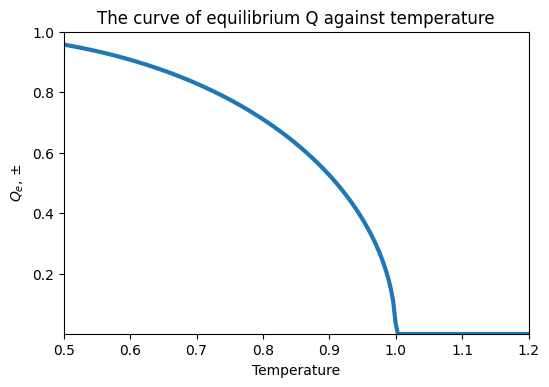

In [ ]:
# Minimisation

n = 200 # Number of points used
Qe = np.zeros(n)  # initialise the array to store the data
count = 0 # initialise the count

for T in np.linspace(0.5, 1.2, n):  # The range of T
  Q0 = 0.9   # Starting point of Q
  res = minimize(bw, Q0, method='nelder-mead', options={'xatol': 1e-8})
  # xatol is tolerance: Absolute error in x between iterations acceptable for convergence.
  Qe[count] = res.x
  count = count+1

# Plotting the minimum Q against T
T = np.linspace(0.5, 1.2, n)

plt.figure(dpi=100)
plt.plot(T, Qe, linewidth=3)

plt.xlabel(r'Temperature')
plt.xlim(0.5,1.2)
plt.ylabel(r'$Q_e$, $\pm$')
plt.ylim(1e-3,1)
plt.title('The curve of equilibrium Q against temperature')

plt.show()

<hr style="border:1px solid black"> </hr>

## Section 3. Further Exercises

### Introducing input and checks in the program above

The previous program contains some input data declared at the
beginning, such as the range and number of values of temperature for the 
$Q_{e}$ evaluation.
  Having them declared and explained at the beginning makes it easy
to change them later for flexible use by yourself others.
   There are many situations in programming, however, in which, although
you want easy modification, you also want to control that only sensible
values are introduced.

- Introduce a check in the program, after the variable declaration, 
  but before the main execution part, in which the values of 
  maximum and minimum $T$ are modified to some default values 
  if they are either below 0.5 or above 2.0 .
- Check that it works by trying out different input values 
  for those variables.

### Obtaining the critical exponent for the order parameter

This kind of transition shows no jump in the order parameter,
but a discontinuity in the derivative. It is called a critical
point, and the order parameter close to it can be seen to
approach the critical point as

\begin{equation*}
Q \sim (T_c-T)^{\beta} \quad \mathrm{for} \quad T<T_c 
\quad \mathrm{and} \quad T\rightarrow T_c
\end{equation*}

where $\beta$ is one of the s-called critical exponents.
Try to obtain the value of $\beta$ for the critical point
in the Bragg-Williams model, and check it graphically.
For that:

- Remove the data points for $T\geq T_C$ (giving log problems with $Q_{eq} = 0$
  or numerically very close).
  
  Of course, knowing the range of $T$ values and that $Q_{eq}$ becomes zero
  at $T/T_c=1$, it is easy to separate non-zero from zero values, but let us 
  find it out explicitly instead. Try the two constructions below. The first one
  introduces the `break` command,
  
  ```
  # First find non-zero values of qeq (to avoid problems with logs)

  eps = 10.**(-7.)     # lowest non-zero value allowed

  for i in range(nt):
      if qeq[i] < eps:
          break         # stops the loop
  nonzero = i-1        # the last array index for which T is larger than the tolerance eps
  # print(i)
  ```
  and the second the `while` conditional loop
  ```
  i = 0
  while qeq[i] > eps:
      i = i + 1
  nonzero = i-1 
  ```

- Plot $\log Q$ vs $\log ( 1 - T/T_c )$.

- Numerically obtain and plot the slope of the previous curve.
  which gives $\beta$ in the $T\rightarrow T_c$ limit ($x \rightarrow -\infty$ 
  in previous plot). You should get $\beta=1/2$.
  
- Check it by plotting a straight line of that slope in the log-log plot 
  and compare.
  
- Compare the fit in the original $Q_{eq}(T/T_c)$ plot.

### Further exploration of random matrices

- Make a small program that 
  -  generates 10,000 square $10\times 10$ random matrices, 
     each one according to a normal distribution around zero 
     and of width equal to one,
  -  calculates and stores the determinant of each matrix in 
     an array (no need to store the matrices themselves), 
  -  plots a histogram of the distribution of determinants, and
  - calculates the standard deviation of that distribution.
  
  You can run the program many times and see how both the  histogram
  and the standard deviation change.
  

- Modify your earlier program so that it performs the above
  for a series of matrix dimensions, from 1 to 40.
  - Store the above calculated standard deviation for the 
    different dimensions in an array (1 to 40)
  - Plot the $\log$ of the standard deviation versus the 
    matrix dimension.